# **Lab 3 – Introduction to OpenCV**

## Part 1: Color Space Conversion and Color Histogram Equalization

Import the necessary libraries for Lab 3:

In [2]:
%matplotlib inline 
import numpy as np
import cv2
import matplotlib.pylab as plt
from skimage import transform,io
from sklearn import cluster
from sklearn.utils import shuffle

### Color Space Conversion

1. Open the image of your choice and show the histograms and images for the R, G, B components. Use the supplied function *plot_RGB(img)*.

In [3]:
# Supplied function - 
def plot_RGB(img):
    plt.imshow(img)
    plt.title('Regular image')
    plt.show()

    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
    plt.figure(figsize=(20,15))
    plt.subplot(322)
    plt.imshow(b)
    plt.title("Blue")
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(324)
    plt.imshow(g)
    plt.title("Green")
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(326)
    plt.imshow(r)
    plt.title("Red")
    plt.subplots_adjust(hspace=0.5)

    color = ('b','g','r')
    titles = ("Blue","Green" ,"Red")
    #plt.figure(figsize=(10,8))
    for i,col in enumerate(color):
        histr = cv2.calcHist([img[:,:,i]],[0],None,[256],[0,256])
        plt.subplot(i*2+321)                             # 311 -> plot in the first cell
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        plt.subplots_adjust(hspace=.5)
        plt.title(str(titles[i]))

    plt.show()

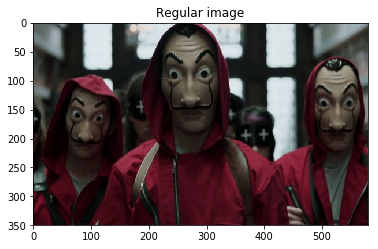

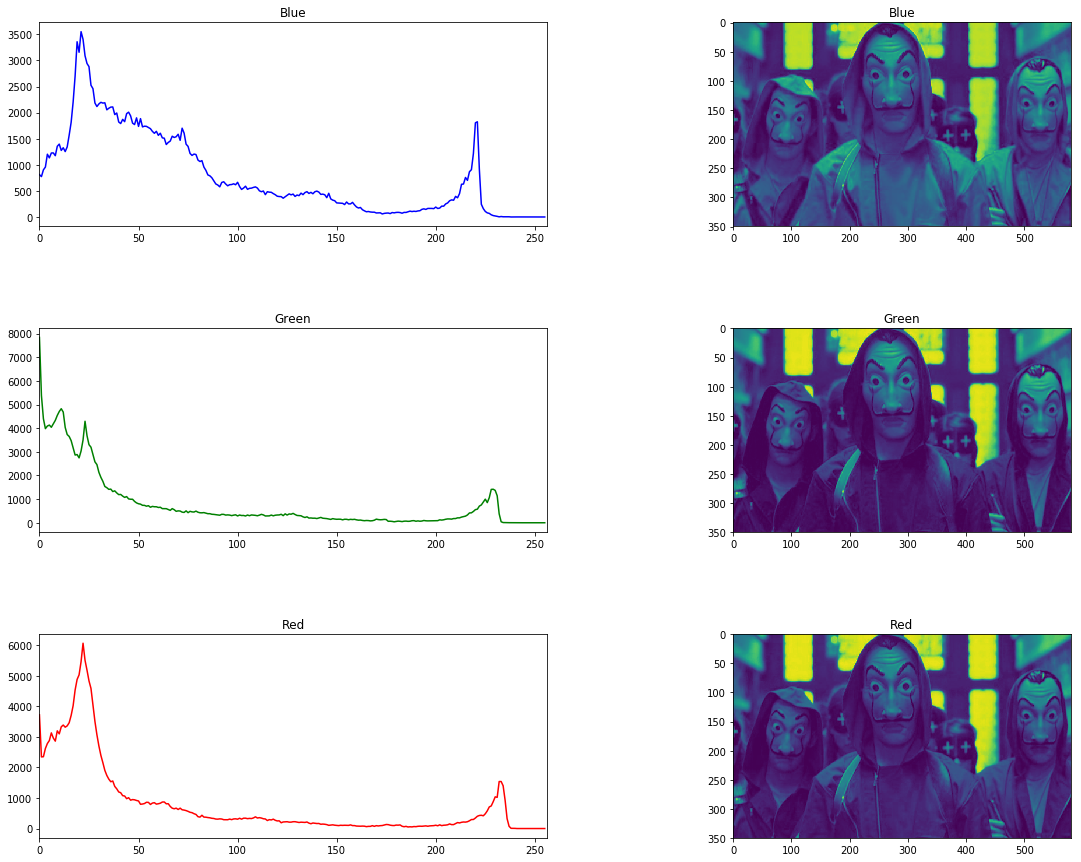

In [4]:
img = io.imread('moneyheist.jpg')
plot_RGB(img)

2.	Convert the image to the HSV color space (use cv2.cvtColor command), and show it with plt.imshow(HSV_image).

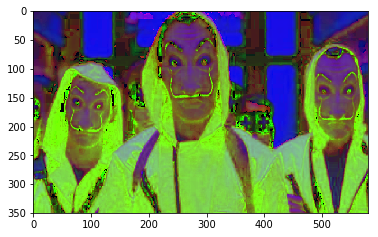

In [5]:
HSV_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(HSV_image)

3.	Show the images and the histograms of the 3 components in the HSV color space.

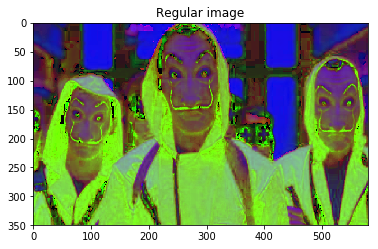

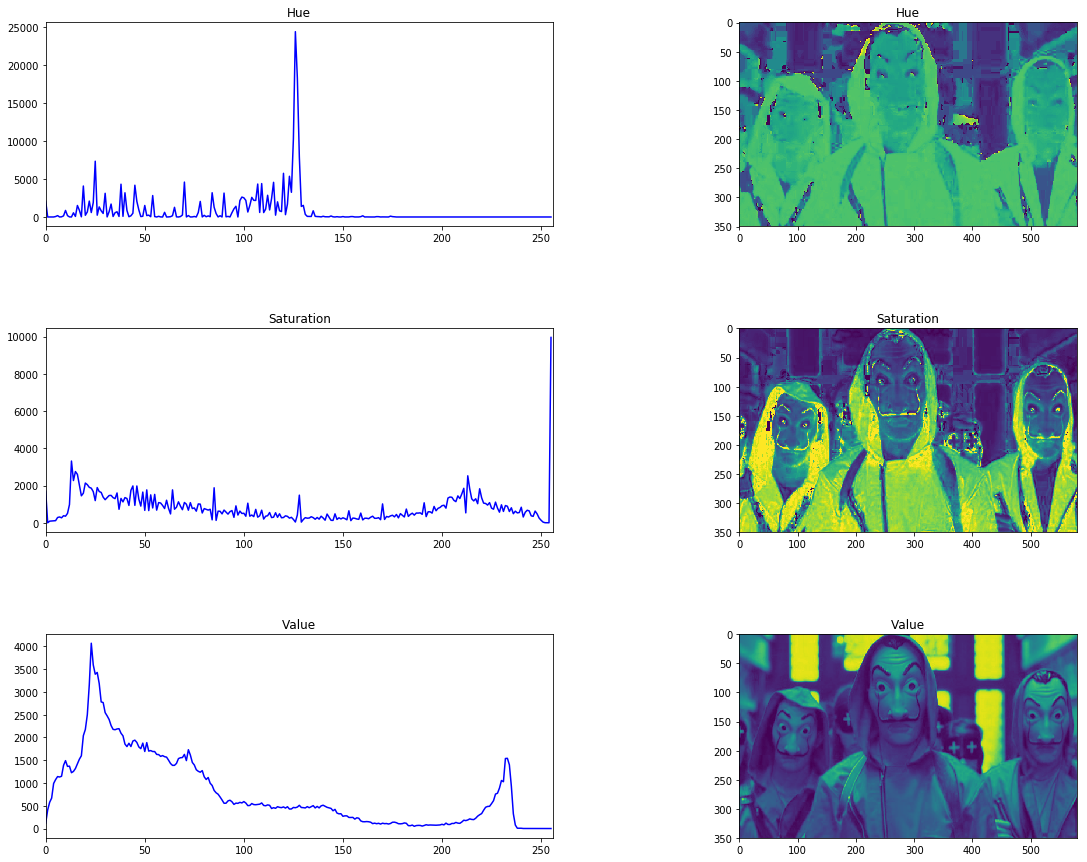

In [6]:
def plot_HSV(img):
    plt.imshow(img)
    plt.title('Regular image')
    plt.show()

    h, s, v = cv2.split(img)
    plt.figure(figsize=(20,15))
    plt.subplot(322),plt.imshow(h),plt.title("Hue"),plt.subplots_adjust(hspace=0.5)
    plt.subplot(324),plt.imshow(s),plt.title("Saturation"),plt.subplots_adjust(hspace=0.5)
    plt.subplot(326),plt.imshow(v),plt.title("Value"),plt.subplots_adjust(hspace=0.5)

    color = ('h','s','v')
    titles = ("Hue", "Saturation", "Value")
    
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.subplot(i*2+321)                             # 311 -> plot in the first cell
        plt.plot(histr,color = 'b')
        plt.xlim([0,256])
        plt.subplots_adjust(hspace=.5)
        plt.title(str(titles[i]))

    plt.show()

plot_HSV(HSV_image)

### Color Histogram Equalization

1. Show the histogram-equalized color image. In this case, the histogram equalization is performed separately on all 3 layers (R, G, B). Use the supplied function hist_eq_rgb.

In [7]:
# Supplied function - 
def hist_eq_rgb(img):
    
    print("image shape: ", img.shape)
    plt.imshow(img)
    plt.show()
    R, G, B = cv2.split(img)
    R_eq = cv2.equalizeHist(R)
    G_eq = cv2.equalizeHist(G)
    B_eq = cv2.equalizeHist(B)

    
    fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(30, 20))
    ax[0,0].imshow(R); ax[0,0].set_title('Red channel')
    ax[1,0].imshow(G); ax[1,0].set_title('Green channel')
    ax[2,0].imshow(B); ax[2,0].set_title('Blue channel')
    ax[0,1].hist(R.flatten(),256,[0,256], color = 'r'); ax[0,1].set_title('Red channel histogram')
    ax[1,1].hist(G.flatten(),256,[0,256], color = 'b'); ax[1,1].set_title('Green channel histogram')
    ax[2,1].hist(B.flatten(),256,[0,256], color = 'g'); ax[2,1].set_title('Blue channel histogram')
    
    ax[0,2].imshow(R_eq); ax[0,2].set_title('Red channel after histogram equalization')
    ax[1,2].imshow(G_eq); ax[1,2].set_title('Green channel after histogram equalization')
    ax[2,2].imshow(B_eq); ax[2,2].set_title('Blue channel after histogram equalization')
    ax[0,3].hist(R_eq.flatten(),256,[0,256], color = 'r');ax[0,3].set_title('Red channel histogram after histogram equalization')
    ax[1,3].hist(G_eq.flatten(),256,[0,256], color = 'b');ax[1,3].set_title('Green channel histogram after histogram equalization')
    ax[2,3].hist(B_eq.flatten(),256,[0,256], color = 'g');ax[2,3].set_title('Blue channel histogram after histogram equalization')
    
    
    
    img_eq = cv2.merge((R_eq,G_eq,B_eq))
    plt.figure()
    
    plt.imshow(img_eq)
    plt.title('The image after histogram equalization on all 3 layers (R, G, B)')
    plt.show()

('image shape: ', (350L, 580L, 3L))


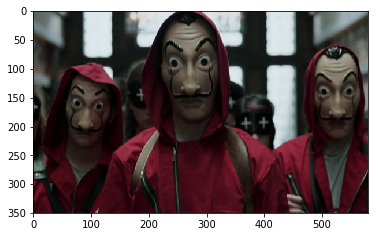

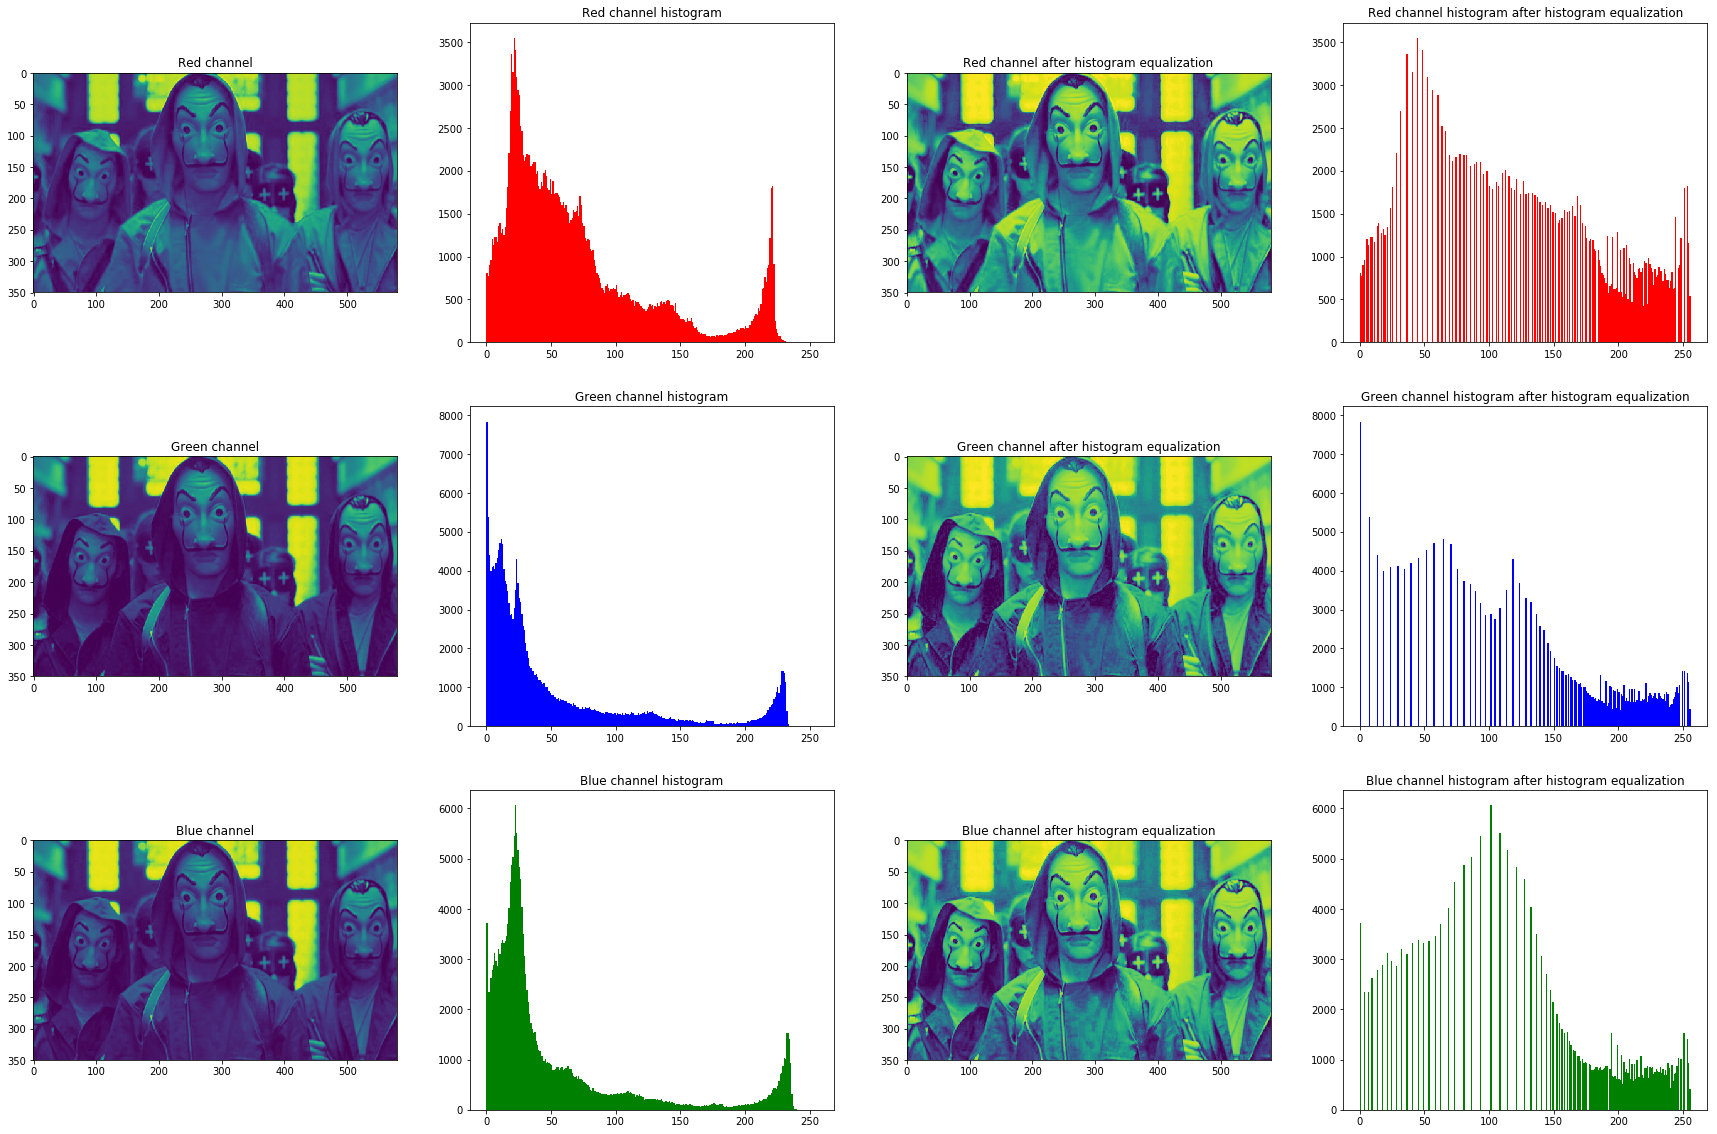

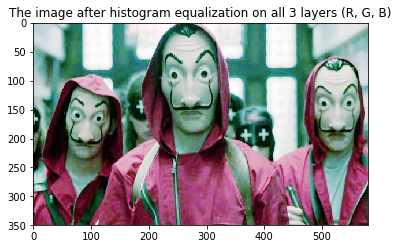

In [8]:
image = io.imread('moneyheist.jpg')
hist_eq_rgb(image)

We can see that the image dont looks as we wanted to, so we will try in other color space:

2. Perform histogram equalization each time on one of the **H, S, V** components (the other 2 components remain unchanged), generating 3 color images. (Hint: in order to display on the monitor the color image that was created in HSV space, you have to convert the image back to RGB space). 

Text(0.5,1,'Image after HistEq on V component:')

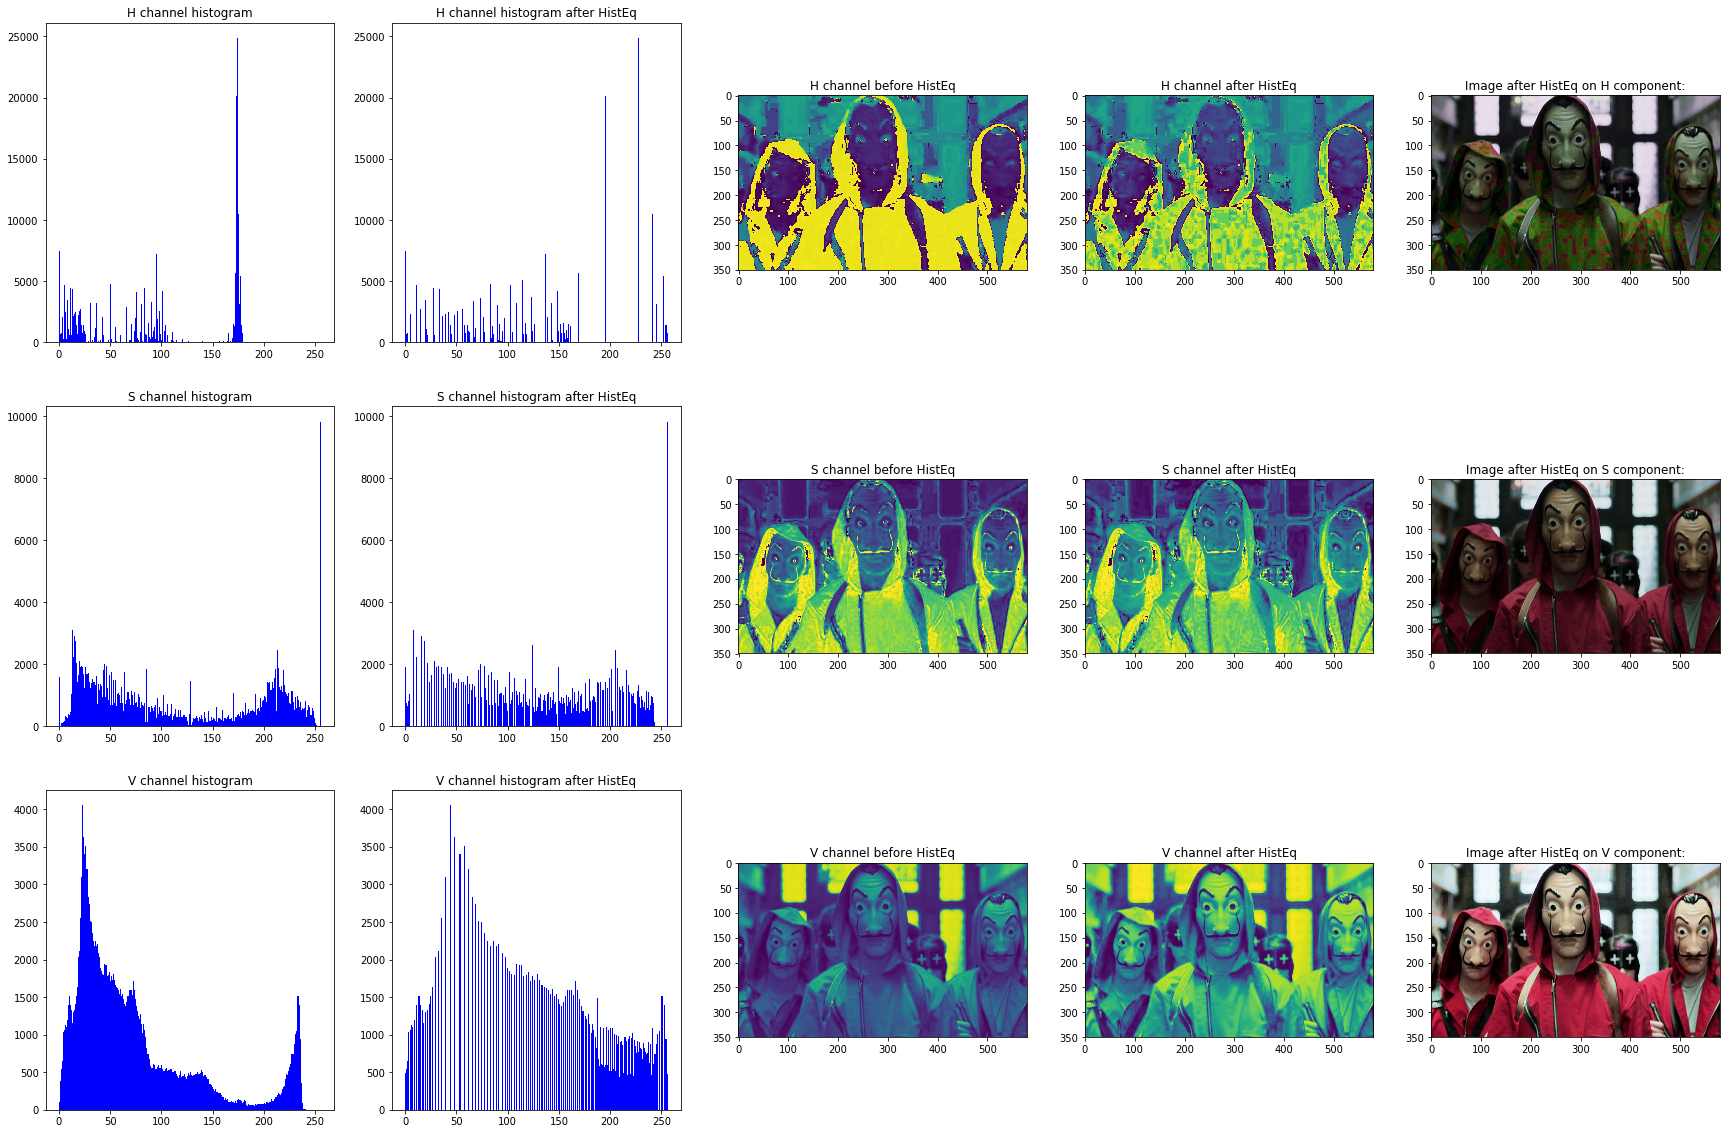

In [3]:
source = cv2.imread('moneyheist.jpg')
HSV_image = cv2.cvtColor(source, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(HSV_image)

fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(30, 20))


h1 = cv2.equalizeHist(h)
new = cv2.merge((h1, s, v))
new1 = cv2.cvtColor(new, cv2.COLOR_HSV2RGB)
ax[0,0].hist(h.flatten(),256,[0,256], color = 'b'); ax[0,0].set_title('H channel histogram')
ax[0,1].hist(h1.flatten(),256,[0,256], color = 'b');ax[0,1].set_title('H channel histogram after HistEq')
ax[0,2].imshow(h); ax[0,2].set_title('H channel before HistEq')
ax[0,3].imshow(h1); ax[0,3].set_title('H channel after HistEq')
ax[0,4].imshow(new1); ax[0,4].set_title("Image after HistEq on H component:")


s1 = cv2.equalizeHist(s)
new2 = cv2.merge((h, s1, v))
new3 = cv2.cvtColor(new2, cv2.COLOR_HSV2RGB)
ax[1,0].hist(s.flatten(),256,[0,256], color = 'b'); ax[1,0].set_title('S channel histogram')
ax[1,1].hist(s1.flatten(),256,[0,256], color = 'b');ax[1,1].set_title('S channel histogram after HistEq')
ax[1,2].imshow(s); ax[1,2].set_title('S channel before HistEq')
ax[1,3].imshow(s1); ax[1,3].set_title('S channel after HistEq')
ax[1,4].imshow(new3); ax[1,4].set_title("Image after HistEq on S component:")


v1 = cv2.equalizeHist(v)
new4 = cv2.merge((h, s, v1))
new5 = cv2.cvtColor(new4, cv2.COLOR_HSV2RGB)
ax[2,0].hist(v.flatten(),256,[0,256], color = 'b'); ax[2,0].set_title('V channel histogram')
ax[2,1].hist(v1.flatten(),256,[0,256], color = 'b');ax[2,1].set_title('V channel histogram after HistEq')
ax[2,2].imshow(v); ax[2,2].set_title('V channel before HistEq')
ax[2,3].imshow(v1); ax[2,3].set_title('V channel after HistEq')
ax[2,4].imshow(new5); ax[2,4].set_title("Image after HistEq on V component:")




    